<a href="https://colab.research.google.com/github/lauramoreno23/Lenguajes/blob/master/Lab_tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset cargado: (500, 12)

Columnas detectadas:
Index(['protocol', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'duration',
       'total_bytes', 'total_pkts', 'avg_pkt_size', 'bytes_per_second',
       'tcp_syn_count', 'label'],
      dtype='object')

Distribución de etiquetas:
label
1    320
0    180
Name: count, dtype: int64


/tmp/ipython-input-2855134832.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({


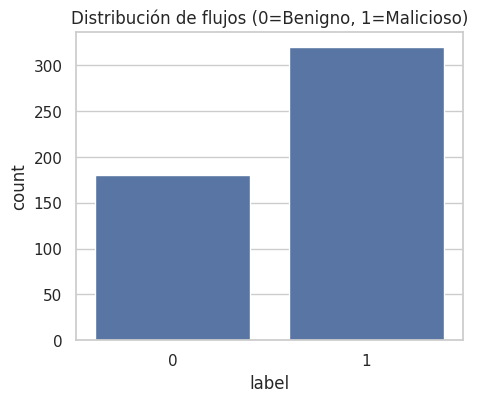

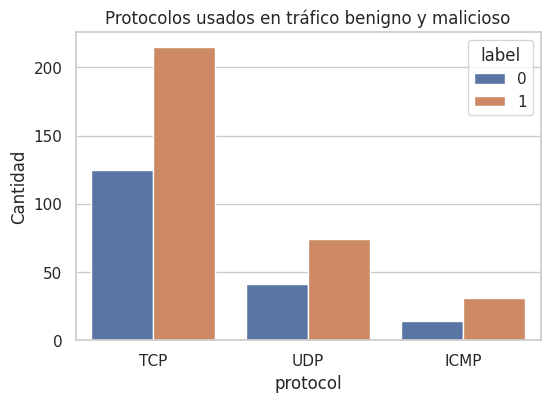

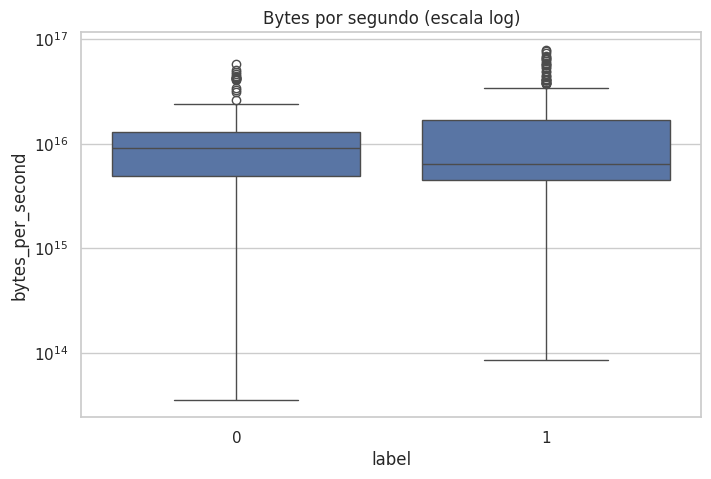

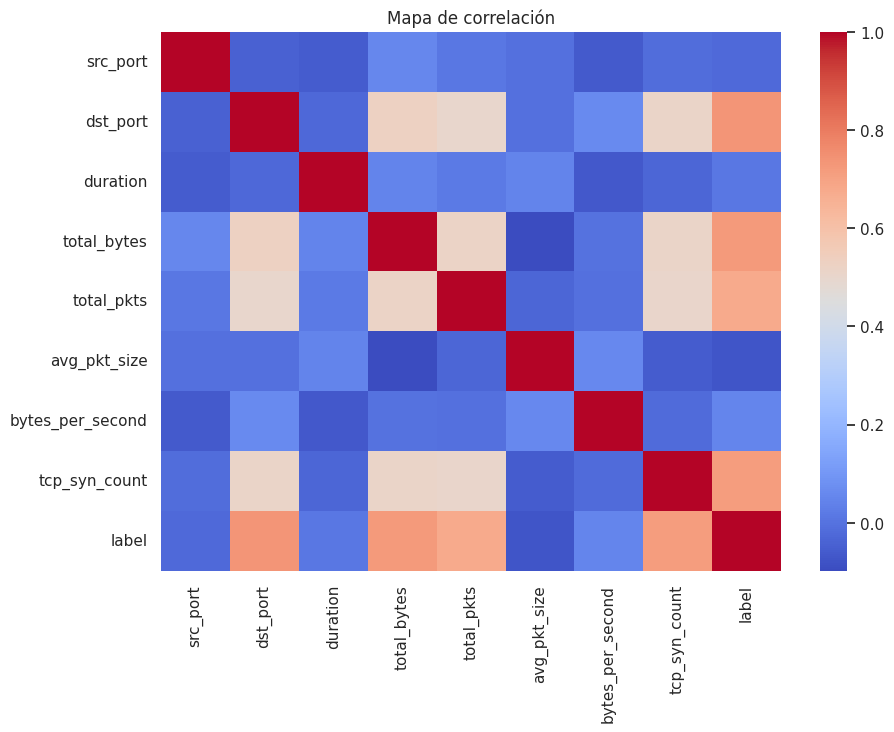


✔ Dataset listo para análisis y gráficas.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "/content/dataset_tesis.csv"

df = pd.read_csv(file_path, sep=";", header=0)
print("Dataset cargado:", df.shape)


df.columns = [
    "protocol", "src_ip", "dst_ip", "src_port", "dst_port",
    "duration", "total_bytes", "total_pkts",
    "avg_pkt_size", "bytes_per_second",
    "tcp_syn_count", "label"
]

print("\nColumnas detectadas:")
print(df.columns)


cols_numericas = [
    "src_port", "dst_port", "duration",
    "total_bytes", "total_pkts", "avg_pkt_size",
    "bytes_per_second", "tcp_syn_count"
]

for col in cols_numericas:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(".", "", regex=False)
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")


df["label"] = (
    df["label"]
    .astype(str)
    .str.lower()
    .str.strip()
    .replace({
        "0": 0, "benign": 0, "normal": 0,
        "1": 1, "malicious": 1, "attack": 1
    })
).astype(int)

print("\nDistribución de etiquetas:")
print(df["label"].value_counts())


sns.set(style="whitegrid", palette="deep")


plt.figure(figsize=(5,4))
sns.countplot(x="label", data=df)
plt.title("Distribución de flujos (0=Benigno, 1=Malicioso)")
plt.show()


plt.figure(figsize=(6,4))
sns.countplot(x="protocol", hue="label", data=df)
plt.title("Protocolos usados en tráfico benigno y malicioso")
plt.ylabel("Cantidad")
plt.show()


plt.figure(figsize=(8,5))
sns.boxplot(x="label", y="bytes_per_second", data=df)
plt.yscale("log")
plt.title("Bytes por segundo (escala log)")
plt.show()

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Mapa de correlación")
plt.show()

print("\n✔ Dataset listo para análisis y gráficas.")


REGRESION LINEAL Y LOGISTICA

/tmp/ipython-input-2993917178.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label"].astype(str).str.lower().str.strip().replace({


Dataset corregido: (500, 12)
  protocol           src_ip           dst_ip  src_port  dst_port  \
0      TCP   179.154.103.96     34.107.61.10     12458     51674   
1      TCP  183.140.176.204   139.74.189.126     56098      5813   
2      UDP     229.24.215.4  223.207.178.145     11326     58295   
3      TCP    246.44.128.45   151.231.17.206     11669        53   
4      TCP     6.139.233.54    147.55.22.185     29383     28338   

           duration  total_bytes  total_pkts       avg_pkt_size  \
0  3940252324656430       196458        1827   5710038499849570   
1  4924777003007530       403201         578   7244245930453990   
2  8393838577940120       161445        1116  11831201113114000   
3  9777891068077260         4720          44   3898179768199330   
4  7522058576934050       399111        1334   6762316366656500   

   bytes_per_second  tcp_syn_count  label  
0  6908102390752310              5      1  
1  7168290954460420             17      1  
2  5899477355958610        

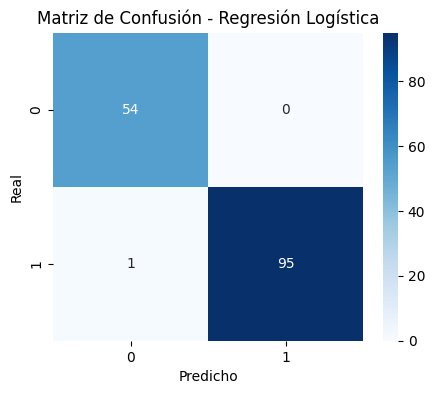

/tmp/ipython-input-2993917178.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Peso", y="Variable", palette="coolwarm")


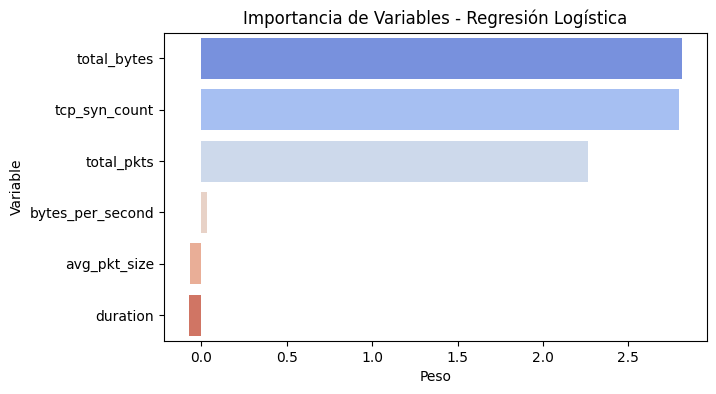


Entrenando REGRESIÓN LINEAL...

MAE: 9658019400712062.0
MSE: 1.9118818189963045e+32
R2: -0.003178990739826082


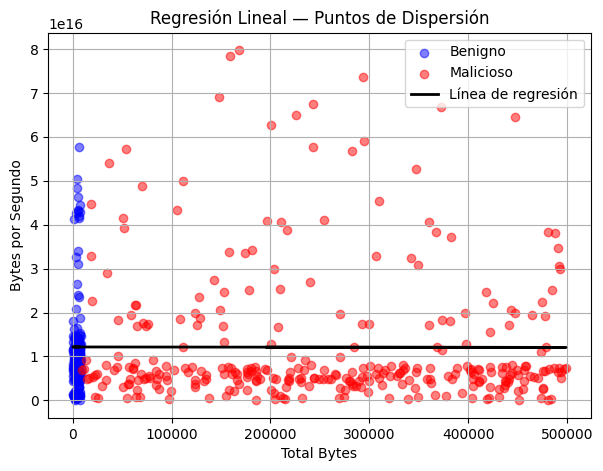


ANÁLISIS FINAL


Precisión modelo LOGÍSTICO: 99.33%

Variables más importantes:
     Variable     Peso
  total_bytes 2.813970
tcp_syn_count 2.798234
   total_pkts 2.263555

Regresión lineal:
MAE: 9658019400712062.00
MSE: 191188181899630445453402013958144.00
R²: -0.00



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    mean_absolute_error, mean_squared_error, r2_score
)

file_path = "/content/dataset_tesis.csv"

df = pd.read_csv(file_path, sep=";", header=0)

df.columns = [
    "protocol", "src_ip", "dst_ip", "src_port", "dst_port",
    "duration", "total_bytes", "total_pkts",
    "avg_pkt_size", "bytes_per_second",
    "tcp_syn_count", "label"
]

num_cols = [
    "src_port", "dst_port", "duration", "total_bytes",
    "total_pkts", "avg_pkt_size", "bytes_per_second", "tcp_syn_count"
]

for c in num_cols:
    df[c] = df[c].astype(str).str.replace(".", "", regex=False)
    df[c] = pd.to_numeric(df[c], errors="coerce")

df["label"] = (
    df["label"].astype(str).str.lower().str.strip().replace({
        "0": 0, "1": 1,
        "benign": 0, "normal": 0,
        "malicious": 1, "attack": 1
    }).astype(int)
)

print("Dataset corregido:", df.shape)
print(df.head())

features = [
    "duration","total_bytes","total_pkts",
    "avg_pkt_size","bytes_per_second","tcp_syn_count"
]

X = df[features]
y = df["label"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("\nEntrenando REGRESIÓN LOGÍSTICA...")

log_model = LogisticRegression(max_iter=2000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

acc = accuracy_score(y_test, y_pred_log)
cm = confusion_matrix(y_test, y_pred_log)

print("\nAccuracy:", acc)
print("\nMatriz de confusión:\n", cm)
print("\nReporte:\n", classification_report(y_test, y_pred_log))

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

coef_df = pd.DataFrame({
    "Variable": features,
    "Peso": log_model.coef_[0]
}).sort_values("Peso", ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(data=coef_df, x="Peso", y="Variable", palette="coolwarm")
plt.title("Importancia de Variables - Regresión Logística")
plt.show()

print("\nEntrenando REGRESIÓN LINEAL...")

X_lin = df[["duration","total_bytes","total_pkts","avg_pkt_size","tcp_syn_count"]]
y_lin = df["bytes_per_second"]

X_lin_scaled = scaler.fit_transform(X_lin)
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_lin_scaled, y_lin, test_size=0.3, random_state=42
)

lin_model = LinearRegression()
lin_model.fit(X_train_lin, y_train_lin)
y_pred_lin = lin_model.predict(X_test_lin)

mae = mean_absolute_error(y_test_lin, y_pred_lin)
mse = mean_squared_error(y_test_lin, y_pred_lin)
r2 = r2_score(y_test_lin, y_pred_lin)

print("\nMAE:", mae)
print("MSE:", mse)
print("R2:", r2)

plt.figure(figsize=(7,5))
plt.scatter(df[df["label"] == 0]["total_bytes"], df[df["label"] == 0]["bytes_per_second"], color="blue", alpha=0.5, label="Benigno")
plt.scatter(df[df["label"] == 1]["total_bytes"], df[df["label"] == 1]["bytes_per_second"], color="red", alpha=0.5, label="Malicioso")

x_vals = np.linspace(df["total_bytes"].min(), df["total_bytes"].max(), 500).reshape(-1,1)
x_vals_scaled = scaler.fit_transform(df[["total_bytes"]])
model_line = LinearRegression().fit(x_vals_scaled, df["bytes_per_second"])
y_vals = model_line.predict(x_vals_scaled)

plt.plot(df["total_bytes"], y_vals, color="black", linewidth=2, label="Línea de regresión")

plt.title("Regresión Lineal — Puntos de Dispersión")
plt.xlabel("Total Bytes")
plt.ylabel("Bytes por Segundo")
plt.legend()
plt.grid(True)
plt.show()

print("\nANÁLISIS FINAL\n")

print(f"""
Precisión modelo LOGÍSTICO: {acc*100:.2f}%

Variables más importantes:
{coef_df.head(3).to_string(index=False)}

Regresión lineal:
MAE: {mae:.2f}
MSE: {mse:.2f}
R²: {r2:.2f}
""")


MATRIZ DE CONFUSIÓN

Dataset cargado correctamente
Dimensiones: (500, 12)
Distribución de clases:
label
1    320
0    180
Name: count, dtype: int64


/tmp/ipython-input-769419635.py:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({


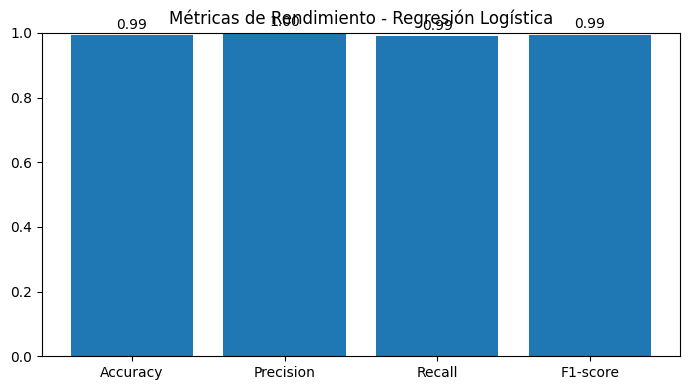

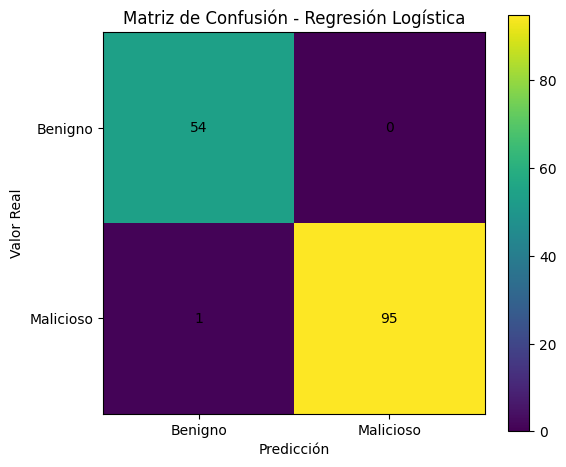

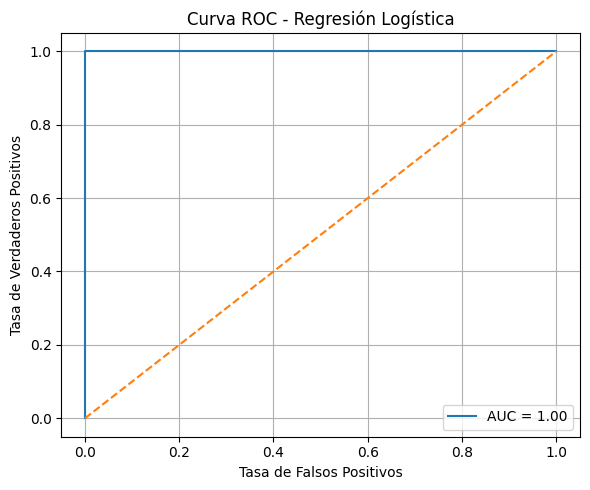

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc
)

# ===============================
# 1. CARGA SEGURA DEL DATASET
# ===============================
file_path = "/dataset_tesis.csv"

try:
    df = pd.read_csv(file_path, sep=";")
except:
    df = pd.read_csv(file_path)

print("Dataset cargado correctamente")
print("Dimensiones:", df.shape)

# ===============================
# 2. NORMALIZAR NOMBRES DE COLUMNAS
# ===============================
df.columns = df.columns.str.strip().str.lower()

expected_cols = [
    "protocol", "src_ip", "dst_ip", "src_port", "dst_port",
    "duration", "total_bytes", "total_pkts",
    "avg_pkt_size", "bytes_per_second",
    "tcp_syn_count", "label"
]

if len(df.columns) != len(expected_cols):
    print("Advertencia: número de columnas distinto al esperado")

df.columns = expected_cols[:len(df.columns)]

# ===============================
# 3. LIMPIEZA DE DATOS
# ===============================
num_cols = [
    "src_port", "dst_port", "duration", "total_bytes",
    "total_pkts", "avg_pkt_size", "bytes_per_second", "tcp_syn_count"
]

for col in num_cols:
    df[col] = df[col].astype(str).str.replace(".", "", regex=False)
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["label"] = (
    df["label"]
    .astype(str)
    .str.lower()
    .str.strip()
    .replace({
        "0": 0, "1": 1,
        "benign": 0, "normal": 0,
        "malicious": 1, "attack": 1
    })
)

df = df.dropna()

df["label"] = df["label"].astype(int)

print("Distribución de clases:")
print(df["label"].value_counts())

# ===============================
# 4. FEATURES Y SPLIT
# ===============================
features = [
    "duration", "total_bytes", "total_pkts",
    "avg_pkt_size", "bytes_per_second", "tcp_syn_count"
]

X = df[features]
y = df["label"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# ===============================
# 5. ENTRENAMIENTO
# ===============================
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# ===============================
# 6. MÉTRICAS
# ===============================
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
values  = [accuracy, precision, recall, f1]

plt.figure(figsize=(7,4))
plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title("Métricas de Rendimiento - Regresión Logística")
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")
plt.tight_layout()
plt.show()

# ===============================
# 7. MATRIZ DE CONFUSIÓN
# ===============================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
plt.imshow(cm)
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.colorbar()

labels = ["Benigno", "Malicioso"]
plt.xticks([0,1], labels)
plt.yticks([0,1], labels)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()

# ===============================
# 8. CURVA ROC
# ===============================
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Regresión Logística")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
